<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/FeatureSelectionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_selection import SelectKBest
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

# 1. Dropping constant features

In [ ]:
import pandas as pd

# Make DataFrame of the given data
data = pd.DataFrame({"A":[1,2,4,1,2,4],
                    "B":[4,5,6,7,8,9],
                    "C":[0,0,0,0,0,0],  # all same values
                    "D":[1,1,1,1,1,1]}) # all same values

In [ ]:
display(data)

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1
5,4,9,0,1


**Variance Threshold**

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# this will remove 0 variance features as we have set threshold=0
var_thres = VarianceThreshold(threshold=0) # calling the instance

var_thres.fit(data)

VarianceThreshold(threshold=0)

In [ ]:
zero_var_columns = var_thres.get_support()

In [ ]:
zero_var_columns = zero_var_columns.tolist()
zero_var_columns

[True, True, False, False]

In [ ]:
required_columns = data.columns[var_thres.get_support()]

In [ ]:
required_columns = required_columns.tolist()
required_columns

['A', 'B']

In [ ]:
constant_columns = [] # this will store the names of all the columns having variance=0
for i in data.columns:
  if i not in required_columns:
    constant_columns.append(i)

In [ ]:
data = data.drop(columns=constant_columns, axis=1)
display(data)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


As you can see above the columns C and D have been dropped as they had 0 variance

Let's try it on a ***bigger dataset***

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
display(df.head())

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
df.shape

(76020, 371)

Splitting the dependent and the independent features.

Performing train_test_split

Always seperate the training and test data before applying any type of .fit transformations

In [ ]:
x = df.drop(columns=['TARGET'], axis=1)
y = df['TARGET']

In [ ]:
print(x.shape, y.shape)

(76020, 370) (76020,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(53214, 370) (22806, 370) (53214,) (22806,)


In [ ]:
var_thres = VarianceThreshold(threshold=0.001) # calling the instance

var_thres.fit(x_train)

VarianceThreshold(threshold=0.001)

In [ ]:
zero_var_columns = var_thres.get_support().tolist()
print(zero_var_columns[0:10])

[True, True, True, True, True, True, True, True, True, True]


In [ ]:
len(zero_var_columns)

370

In [ ]:
required_columns = x_train.columns[var_thres.get_support()]
required_columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=297)

In [ ]:
required_columns = required_columns.tolist()

In [ ]:
required_columns[0:10]

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3']

In [ ]:
len(required_columns)

297

In [ ]:
print('total number of dropped columns: ', df.shape[1]-len(required_columns)-1) # -1 for TARGET feature

total number of dropped columns:  73


In [ ]:
constant_columns = [] # this will store the names of all the columns having variance=0
for i in x_train.columns:
  if i not in required_columns:
    constant_columns.append(i)

In [ ]:
x_train = x_train.drop(columns=constant_columns, axis=1)
y_train = y_train.drop(columns=constant_columns, axis=1)

In [ ]:
print(x_train.shape, y_train.shape)

(53214, 297) (53214,)


# 2. Correlation

If there are multiple non-target features who are highly correlated to each other, we can simply take one of those many as they are acting like duplicate features.

The model would think it's the same feature again, as it cannot differentiate between the features based on it's name, but only based on it's values.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [ ]:
df = raw_df
df = df.dropna(how='any')

In [ ]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [ ]:
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


In [ ]:
target.shape

(506,)

In [ ]:
df.shape

(506, 11)

In [ ]:
x = df
y = pd.DataFrame(target)

In [ ]:
print(x.shape, y.shape)

(506, 11) (506, 1)


In [ ]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((354, 11), (152, 11))

In [ ]:
x_train.corr()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780
1,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838
2,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353
3,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683
4,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046
5,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526
6,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729
7,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620
8,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687
9,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518


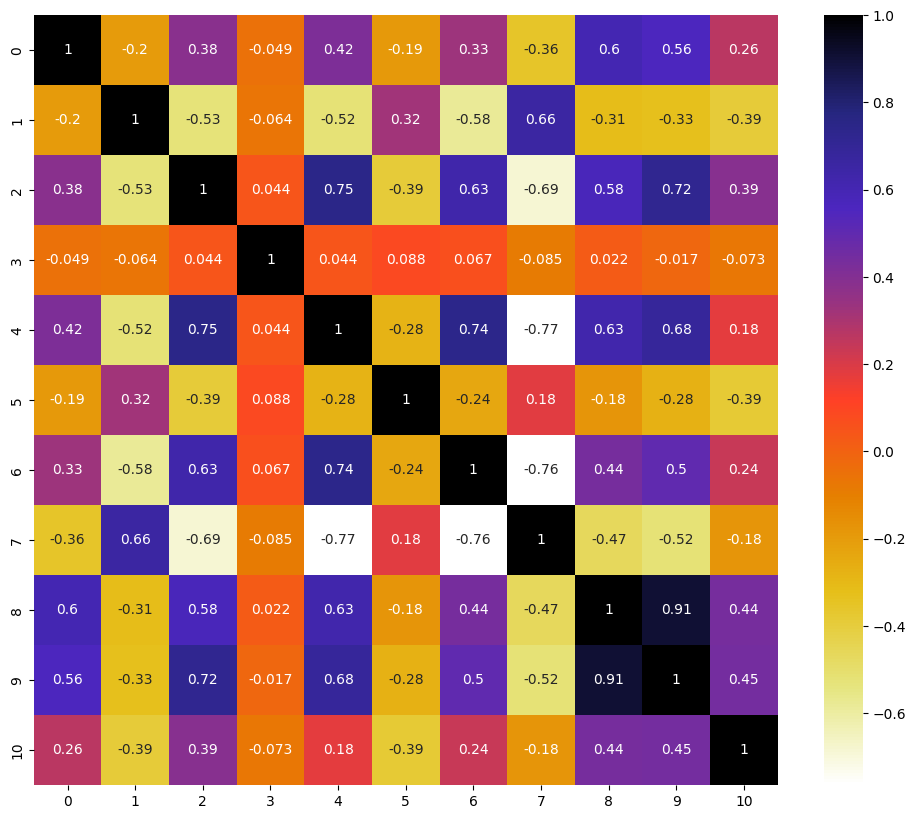

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.7)
len(set(corr_features))

4

In [ ]:
corr_features

{4, 6, 7, 9}

In [ ]:
x_train.drop(columns=corr_features, axis=1)
x_test.drop(columns=corr_features, axis=1)

,0,1,2,3,5,8,10
658,0.06724,0.0,3.24,0.0,6.333,4.0,16.9
742,9.23230,0.0,18.10,0.0,6.216,24.0,20.2
438,0.11425,0.0,13.89,1.0,6.373,5.0,16.4
806,24.80170,0.0,18.10,0.0,5.349,24.0,20.2
156,0.05646,0.0,12.83,0.0,6.232,5.0,18.7
...,...,...,...,...,...,...,...
8,0.06905,0.0,2.18,0.0,7.147,3.0,18.7
856,7.36711,0.0,18.10,0.0,6.193,24.0,20.2
770,16.81180,0.0,18.10,0.0,5.277,24.0,20.2
616,0.49298,0.0,9.90,0.0,6.635,4.0,18.4


Lets try it with a big dataset

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.shape

(76020, 371)

In [ ]:
x=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

<Axes: >

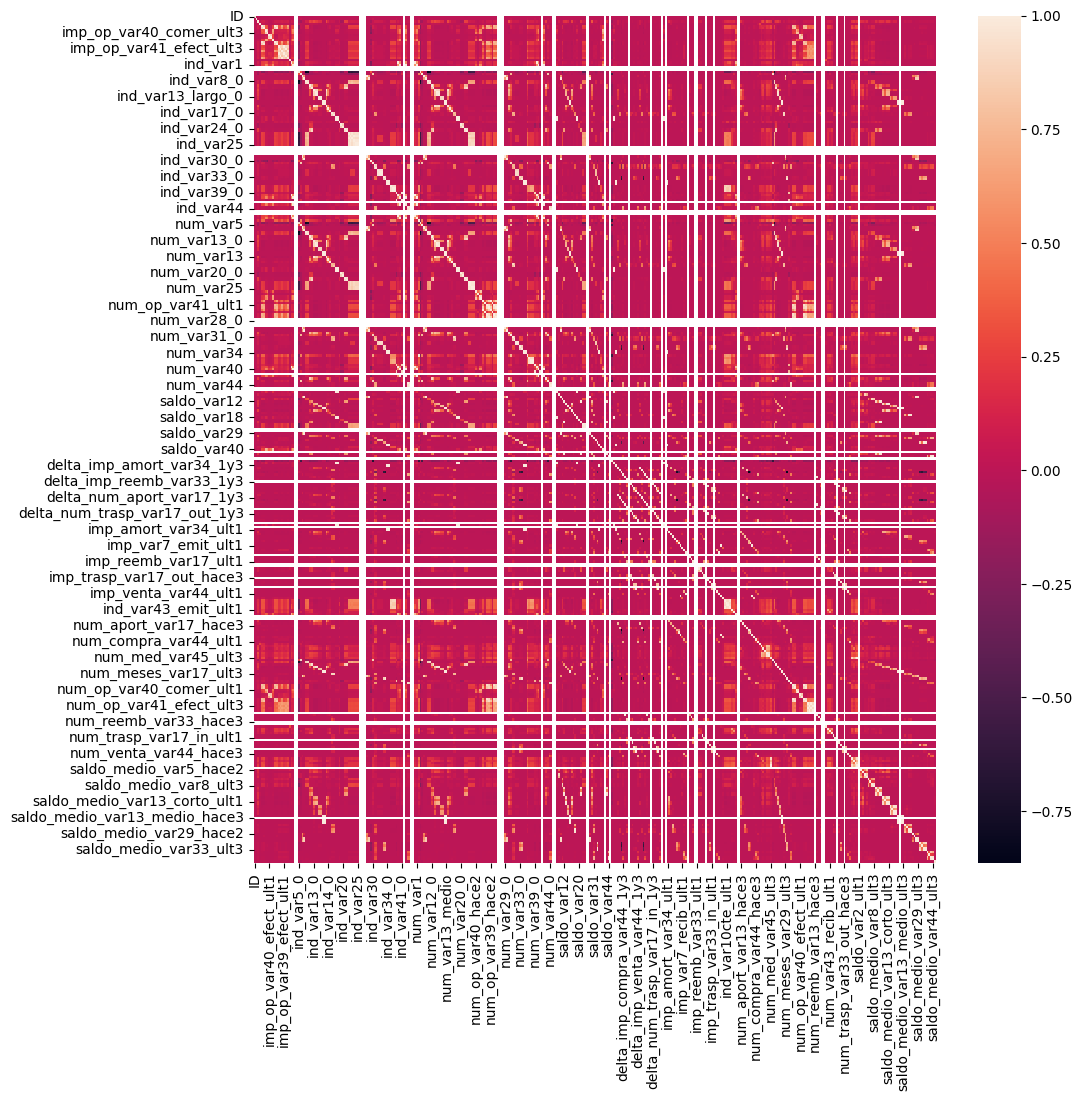

In [ ]:
#Using Pearson Correlation
corrmat = x_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [ ]:
corr_features = correlation(x_train, 0.9)
len(set(corr_features))

164

In [ ]:
x_train.drop(corr_features,axis=1, inplace=True)

In [ ]:
x_train.shape

(53214, 206)

# 3. Information gain - mutual information In Classification Problem Statements

**Mutual Information**

MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

**Youtube Videos**

1. Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0
2. Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA
3. Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw
4. Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

In [ ]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df['Wine'].unique()

array([1, 2, 3])

In [ ]:
df['Wine'].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [ ]:
df.shape

(178, 14)

In [ ]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.42189335, 0.30572528, 0.18163677, 0.25037332, 0.21823836,
       0.48074474, 0.71988122, 0.1410878 , 0.25625205, 0.61106158,
       0.55564445, 0.54802749, 0.54161044])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.719881
Color.int               0.611062
Hue                     0.555644
OD                      0.548027
Proline                 0.541610
Phenols                 0.480745
Alcohol                 0.421893
Malic.acid              0.305725
Proanth                 0.256252
Acl                     0.250373
Mg                      0.218238
Ash                     0.181637
Nonflavanoid.phenols    0.141088
dtype: float64

<Axes: >

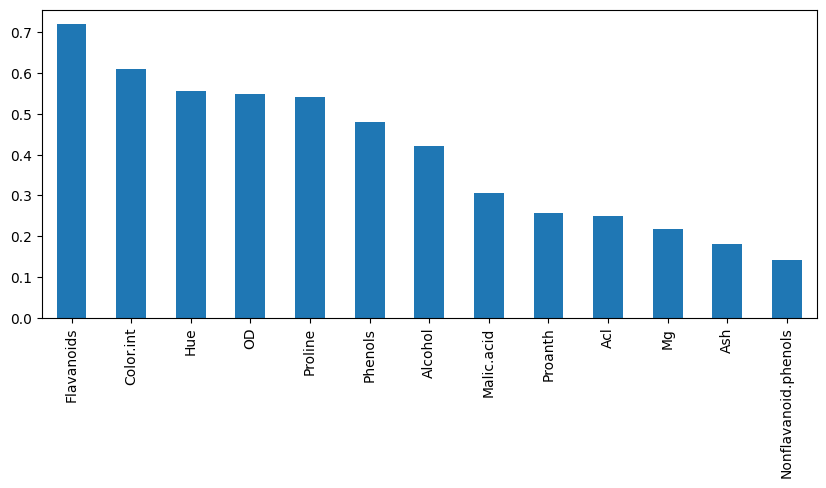

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 4))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

Difference Between Information Gain And Mutual Information

I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data

# Comparion of Univariate And Mutual Information

Comparison of F-test and mutual information
1. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

#4. Information gain - mutual information In Regression Problem Statements

In [ ]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
df=pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.shape

(1460, 81)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
list(df.isnull().sum())

[0,
 0,
 0,
 259,
 0,
 0,
 1369,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 690,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1453,
 1179,
 1406,
 0,
 0,
 0,
 0,
 0,
 0]

Since there are lot of null values, we have to deal with them numerically, but we can only deal with them if they are of float or integer types, so we remove any column having values of datatype other than int or float, eg: object

In [ ]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)

In [ ]:
len(numerical_cols)

38

In [ ]:
print('These columns have int or float datatype values')
print(numerical_cols)

These columns have int or float datatype values
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [ ]:
total_cols = list(df.columns)
not_needed_cols = list(set(total_cols)-set(numerical_cols))

In [ ]:
df = df.drop(columns=not_needed_cols, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'], axis=1),
    df['SalePrice'],
    test_size=0.3,
    random_state=0)

In [ ]:
print('null values')
list(x_train.isnull().sum())

null values


[0,
 189,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 54,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Determine the mutual information

In [ ]:
mutual_info = mutual_info_regression(x_train.fillna(0), y_train)
mutual_info

array([0.25052667, 0.21245911, 0.16695554, 0.52860139, 0.10009794,
       0.35112344, 0.24269389, 0.11136155, 0.15320417, 0.        ,
       0.11397882, 0.38714803, 0.31286907, 0.2312223 , 0.        ,
       0.48157145, 0.02558804, 0.00500386, 0.27082378, 0.07664556,
       0.0357814 , 0.0243559 , 0.18797749, 0.18675246, 0.26361742,
       0.37067226, 0.36858219, 0.06475504, 0.1691727 , 0.00580242,
       0.00147439, 0.02146992, 0.        , 0.00512128, 0.        ,
       0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.528601
GrLivArea        0.481571
TotalBsmtSF      0.387148
GarageCars       0.370672
GarageArea       0.368582
YearBuilt        0.351123
1stFlrSF         0.312869
FullBath         0.270824
GarageYrBlt      0.263617
MSSubClass       0.250527
YearRemodAdd     0.242694
2ndFlrSF         0.231222
LotFrontage      0.212459
TotRmsAbvGrd     0.187977
Fireplaces       0.186752
OpenPorchSF      0.169173
LotArea          0.166956
BsmtFinSF1       0.153204
BsmtUnfSF        0.113979
MasVnrArea       0.111362
OverallCond      0.100098
HalfBath         0.076646
WoodDeckSF       0.064755
BedroomAbvGr     0.035781
BsmtFullBath     0.025588
KitchenAbvGr     0.024356
ScreenPorch      0.021470
EnclosedPorch    0.005802
MiscVal          0.005121
BsmtHalfBath     0.005004
3SsnPorch        0.001474
BsmtFinSF2       0.000000
LowQualFinSF     0.000000
PoolArea         0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

<Axes: >

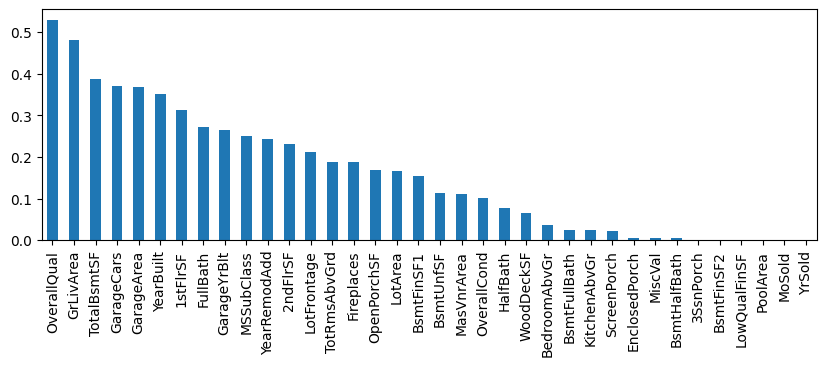

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10,3))

In [ ]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(x_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7a92c4e593f0>)

In [ ]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [ ]:
x_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

# 5. Fisher Score- Chisquare Test For Feature Selection
Compute chi-squared stats between each non-negative feature and class.

* This score should be used to evaluate categorical variables in a classification task.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies (e.g., term counts in document classification), relative to the classes.

Recall that the chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. The Chi Square statistic is commonly used for testing relationships between categorical variables.

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories.

**Youtube Videos**

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

https://www.youtube.com/watch?v=YrhlQB3mQFI

In [19]:
import seaborn as sns
df=sns.load_dataset('titanic')

In [21]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
##['sex','embarked','alone','pclass','Survived']
df=df[['sex','embarked','alone','pclass','survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [23]:
import numpy as np
df['sex']=np.where(df['sex']=="male",1,0)
df.head()

,sex,embarked,alone,pclass,survived
0,1,S,False,3,0
1,0,C,False,1,1
2,0,S,True,3,1
3,0,S,False,1,1
4,1,S,True,3,0


In [24]:
### Let's perform label encoding on sex column
### let's perform label encoding on embarked
ordinal_label = {k: i for i, k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

In [25]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,False,3,0
1,0,1,False,1,1
2,0,0,True,3,1
3,0,0,False,1,1
4,1,0,True,3,0


In [26]:
### let's perform label encoding on alone
df['alone']=np.where(df['alone']==True,1,0)

In [27]:
df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [28]:
### train Test split is usually done to avaoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['sex','embarked','alone','pclass']],
                                              df['survived'],test_size=0.3,random_state=100)

In [ ]:
X_train.head()

,sex,embarked,alone,pclass
69,1,0,0,3
85,0,0,0,3
794,1,0,1,3
161,0,0,1,2
815,1,0,1,1


In [ ]:
X_train['sex'].unique()

array([1, 0])

In [ ]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [ ]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)

In [ ]:
f_p_values

(array([65.67929505,  7.55053653, 10.88471585, 21.97994154]),
 array([5.30603805e-16, 5.99922095e-03, 9.69610546e-04, 2.75514881e-06]))

In [ ]:
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

sex         5.306038e-16
embarked    5.999221e-03
alone       9.696105e-04
pclass      2.755149e-06
dtype: float64

In [ ]:
p_values.sort_index(ascending=False)

sex         5.306038e-16
pclass      2.755149e-06
embarked    5.999221e-03
alone       9.696105e-04
dtype: float64

# Observation
Sex Column is the most important column when compared to the output feature Survived

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(dual=False, penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(dual=False,
                                                     penalty='l1'))),
                ('classification', RandomForestClassifier())])

In [38]:
test_prediction = clf.predict(X_test)

In [43]:
accuracy = clf.score(X_test, y_test)

In [44]:
accuracy

0.7835820895522388